In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, cauchy

## 1. Gen $N(0,1)$ using Inverse CDF

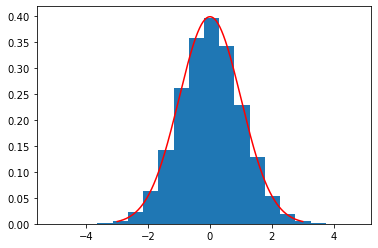

In [2]:
def gen_norm_inverse(size):
    u = uniform.rvs(size=size)
    return norm.ppf(u)

size = 100_000
x1 = gen_norm_inverse(size)

plt.hist(x1, bins=20, density=True)
x_grid = np.linspace(-3, 3, 1000)
plt.plot(x_grid, norm.pdf(x_grid), color='red')
plt.show()

In [3]:
%%timeit -n 10
gen_norm_inverse(size)

9.4 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 2. Gen $N(0,1)$ using CLT

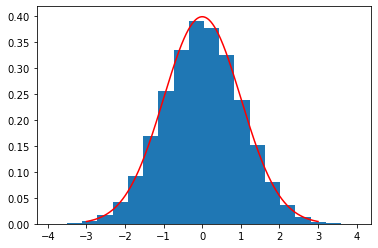

In [4]:
def gen_norm_clt(size):
    u = uniform.rvs(size=(size,12))
    return np.sum(u, axis=-1) - 6

x2 = gen_norm_clt(size)
plt.hist(x2, bins=20, density=True)
x_grid = np.linspace(-3, 3, 1000)
plt.plot(x_grid, norm.pdf(x_grid), color='red')
plt.show()

In [5]:
%%timeit -n 10
gen_norm_clt(size)

18.6 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 3. Gen $N(0,1)$ using Box-Muller

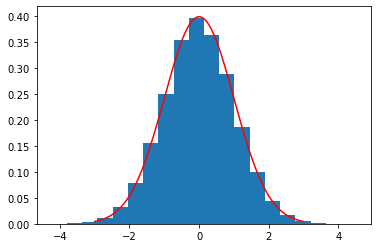

In [6]:
def gen_norm_box_muller(size):
    u = uniform.rvs(size=(size,2))
    return np.sqrt(-2*np.log(u[:,0])) * np.cos(2*np.pi*u[:,1])

x3 = gen_norm_box_muller(size)
plt.hist(x3, bins=20, density=True)
x_grid = np.linspace(-3, 3, 1000)
plt.plot(x_grid, norm.pdf(x_grid), color='red')
plt.show()

In [7]:
%%timeit -n 10
gen_norm_box_muller(size)

5.58 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 4. Gen $N(0,1)$ using rejection sampling

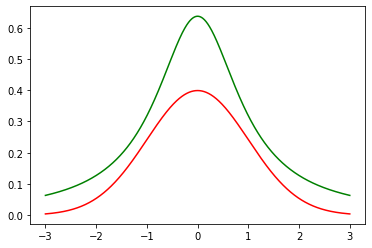

In [10]:
plt.plot(x_grid, norm.pdf(x_grid), color='red')
plt.plot(x_grid, 2*cauchy.pdf(x_grid), color='green')
plt.show()

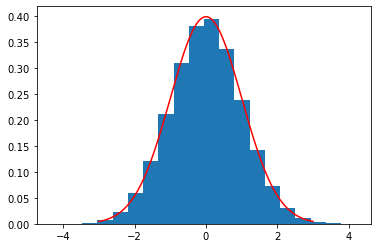

In [11]:
def gen_norm_rej_sampling(size, m=2):
    z = cauchy.rvs(size=m*size)
    u = uniform.rvs(loc=0, scale=m*cauchy.pdf(z), size=z.shape)
    x = z[u < norm.pdf(z)]
    return x

x4 = gen_norm_rej_sampling(size)
plt.hist(x4, bins=20, density=True)
x_grid = np.linspace(-3, 3, 1000)
plt.plot(x_grid, norm.pdf(x_grid), color='red')
plt.show()

In [12]:
x4.shape

(100020,)

In [13]:
%%timeit -n 10
gen_norm_rej_sampling(size)

32.5 ms ± 444 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 5. Gen $N(0,1)$ using `scipy.norm.rvs`

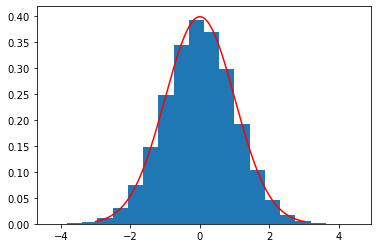

In [14]:
x5 = norm.rvs(size=size)

plt.hist(x5, bins=20, density=True)
x_grid = np.linspace(-3, 3, 1000)
plt.plot(x_grid, norm.pdf(x_grid), color='red')
plt.show()

In [15]:
%%timeit -n 10
norm.rvs(size=size)

2.73 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
import random
??random.gauss